In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
np.__version__

'1.20.1'

In [3]:
df = pd.read_csv("C:/download files/playstore-analysis.csv")
df

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews          Size     Installs  Type Price Content Rating  \
0         4.1     159  19000.000000      10,000+  Free     0       Everyone   
1         3.9     967  14000.000000     500,000+  Free     0       Everyone   
2         4.7   87510   8700.000000   5,000,000+  Free     0       Everyone   
3         4.5  215644  25000.000000  50,000,000+  Free     0           Teen   
4         4.3     967   2800.000000     100,000+  Free     0       Everyone   
...       ...     ...           ...          ...   ...   ...            ...   
10836     4.5      38  53000.000000       5,000+  Free     0       Everyone   
10837     5.0       4   3600.000000         100+  Free     0       Everyone   
10838     NaN       3   9500.000000       1,000+  Free     0       Everyone   
10839     4.5     114  21516.529524       1,000+  Free     0     Mature 17+   
10840     4.5  398307  19000.000000  10,000,000+  Free     0       Everyone   

                          Genres      Last Updated         Current Ver  \
0                   Art & Design   January 7, 2018               1.0.0   
1      Art & Design;Pretend Play  January 15, 2018               2.0.0   
2                   Art & Design    August 1, 2018               1.2.4   
3                   Art & Design      June 8, 2018  Varies with device   
4        Art & Design;Creativity     June 20, 2018                 1.1   
...                          ...               ...                 ...   
10836                  Education     July 25, 2017                1.48   
10837                  Education      July 6, 2018                 1.0   
10838                    Medical  January 20, 2017                 1.0   
10839          Books & Reference  January 19, 2015  Varies with device   
10840                  Lifestyle     July 25, 2018  Varies with device   

              Android Ver  
0            4.0.3 and up  
1            4.0.3 and up  
2            4.0.3 and up  
3              4.2 and up  
4              4.4 and up  
...                   ...  
10836          4.1 and up  
10837          4.1 and up  
10838          2.2 and up  
10839  Varies with device  
10840  Varies with device  

[10841 rows x 13 columns]

In [4]:
df.shape

(10841, 13)

In [7]:
df[df['Rating'].isnull()]

App             Category  Rating  \
23                  Mcqueen Coloring pages       ART_AND_DESIGN     NaN   
113              Wrinkles and rejuvenation               BEAUTY     NaN   
123                 Manicure - nail design               BEAUTY     NaN   
126           Skin Care and Natural Beauty               BEAUTY     NaN   
129    Secrets of beauty, youth and health               BEAUTY     NaN   
...                                    ...                  ...     ...   
10824                            Cardio-FR              MEDICAL     NaN   
10825                   Naruto & Boruto FR               SOCIAL     NaN   
10831             payermonstationnement.fr  MAPS_AND_NAVIGATION     NaN   
10835                             FR Forms             BUSINESS     NaN   
10838               Parkinson Exercices FR              MEDICAL     NaN   

      Reviews     Size  Installs  Type Price Content Rating  \
23         61   7000.0  100,000+  Free     0       Everyone   
113       182   5700.0  100,000+  Free     0   Everyone 10+   
123       119   3700.0   50,000+  Free     0       Everyone   
126       654   7400.0  100,000+  Free     0           Teen   
129        77   2900.0   10,000+  Free     0     Mature 17+   
...       ...      ...       ...   ...   ...            ...   
10824      67  82000.0   10,000+  Free     0       Everyone   
10825       7   7700.0      100+  Free     0           Teen   
10831      38   9800.0    5,000+  Free     0       Everyone   
10835       0   9600.0       10+  Free     0       Everyone   
10838       3   9500.0    1,000+  Free     0       Everyone   

                                Genres        Last Updated Current Ver  \
23     Art & Design;Action & Adventure       March 7, 2018       1.0.0   
113                             Beauty  September 20, 2017         8.0   
123                             Beauty       July 23, 2018         1.3   
126                             Beauty       July 17, 2018        1.15   
129                             Beauty      August 8, 2017         2.0   
...                                ...                 ...         ...   
10824                          Medical       July 31, 2018       2.2.2   
10825                           Social    February 2, 2018         1.0   
10831                Maps & Navigation       June 13, 2018   2.0.148.0   
10835                         Business  September 29, 2016       1.1.5   
10838                          Medical    January 20, 2017         1.0   

      Android Ver  
23     4.1 and up  
113    3.0 and up  
123    4.1 and up  
126    4.1 and up  
129    2.3 and up  
...           ...  
10824  4.4 and up  
10825  4.0 and up  
10831  4.0 and up  
10835  4.0 and up  
10838  2.2 and up  

[1474 rows x 13 columns]

# 1. Data clean up ‚Äì

   # a. Drop records where rating is missing since rating is our target/study variable

In [5]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
df.dropna(subset = ['Rating'],axis=0,inplace=True)

In [8]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [9]:
df


App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews          Size     Installs  Type Price Content Rating  \
0         4.1     159  19000.000000      10,000+  Free     0       Everyone   
1         3.9     967  14000.000000     500,000+  Free     0       Everyone   
2         4.7   87510   8700.000000   5,000,000+  Free     0       Everyone   
3         4.5  215644  25000.000000  50,000,000+  Free     0           Teen   
4         4.3     967   2800.000000     100,000+  Free     0       Everyone   
...       ...     ...           ...          ...   ...   ...            ...   
10834     4.0       7   2600.000000         500+  Free     0       Everyone   
10836     4.5      38  53000.000000       5,000+  Free     0       Everyone   
10837     5.0       4   3600.000000         100+  Free     0       Everyone   
10839     4.5     114  21516.529524       1,000+  Free     0     Mature 17+   
10840     4.5  398307  19000.000000  10,000,000+  Free     0       Everyone   

                          Genres      Last Updated         Current Ver  \
0                   Art & Design   January 7, 2018               1.0.0   
1      Art & Design;Pretend Play  January 15, 2018               2.0.0   
2                   Art & Design    August 1, 2018               1.2.4   
3                   Art & Design      June 8, 2018  Varies with device   
4        Art & Design;Creativity     June 20, 2018                 1.1   
...                          ...               ...                 ...   
10834                  Education     June 18, 2017               1.0.0   
10836                  Education     July 25, 2017                1.48   
10837                  Education      July 6, 2018                 1.0   
10839          Books & Reference  January 19, 2015  Varies with device   
10840                  Lifestyle     July 25, 2018  Varies with device   

              Android Ver  
0            4.0.3 and up  
1            4.0.3 and up  
2            4.0.3 and up  
3              4.2 and up  
4              4.4 and up  
...                   ...  
10834          4.1 and up  
10836          4.1 and up  
10837          4.1 and up  
10839  Varies with device  
10840  Varies with device  

[9367 rows x 13 columns]

In [10]:
df.shape

(9367, 13)

# b. Check the null values for the Android Ver column.

  #   i. Are all 3 records having the same problem?

In [11]:
df['Android Ver'].isnull().sum()

3

In [12]:
df[df['Android Ver'].isnull()]

App         Category  Rating  \
4453                    [substratum] Vacuum: P  PERSONALIZATION     4.4   
4490                      Pi Dark [substratum]  PERSONALIZATION     4.5   
10472  Life Made WI-Fi Touchscreen Photo Frame              1.9    19.0   

      Reviews          Size Installs  Type     Price Content Rating  \
4453      230  11000.000000   1,000+  Paid     $1.49       Everyone   
4490      189   2100.000000  10,000+  Free         0       Everyone   
10472    3.0M  21516.529524     Free     0  Everyone            NaN   

                  Genres    Last Updated Current Ver Android Ver  
4453     Personalization   July 20, 2018         4.4         NaN  
4490     Personalization  March 27, 2018         1.1         NaN  
10472  February 11, 2018          1.0.19  4.0 and up         NaN

  # --> ii. Drop the 3rd record i.e. record for ‚ÄúLife Made WIFI ‚Ä¶‚Äù

In [13]:
df.drop(index=10472,inplace=True)

In [14]:
df[df['Android Ver'].isnull()]

App         Category  Rating Reviews     Size  \
4453  [substratum] Vacuum: P  PERSONALIZATION     4.4     230  11000.0   
4490    Pi Dark [substratum]  PERSONALIZATION     4.5     189   2100.0   

     Installs  Type  Price Content Rating           Genres    Last Updated  \
4453   1,000+  Paid  $1.49       Everyone  Personalization   July 20, 2018   
4490  10,000+  Free      0       Everyone  Personalization  March 27, 2018   

     Current Ver Android Ver  
4453         4.4         NaN  
4490         1.1         NaN

In [15]:
df

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews          Size     Installs  Type Price Content Rating  \
0         4.1     159  19000.000000      10,000+  Free     0       Everyone   
1         3.9     967  14000.000000     500,000+  Free     0       Everyone   
2         4.7   87510   8700.000000   5,000,000+  Free     0       Everyone   
3         4.5  215644  25000.000000  50,000,000+  Free     0           Teen   
4         4.3     967   2800.000000     100,000+  Free     0       Everyone   
...       ...     ...           ...          ...   ...   ...            ...   
10834     4.0       7   2600.000000         500+  Free     0       Everyone   
10836     4.5      38  53000.000000       5,000+  Free     0       Everyone   
10837     5.0       4   3600.000000         100+  Free     0       Everyone   
10839     4.5     114  21516.529524       1,000+  Free     0     Mature 17+   
10840     4.5  398307  19000.000000  10,000,000+  Free     0       Everyone   

                          Genres      Last Updated         Current Ver  \
0                   Art & Design   January 7, 2018               1.0.0   
1      Art & Design;Pretend Play  January 15, 2018               2.0.0   
2                   Art & Design    August 1, 2018               1.2.4   
3                   Art & Design      June 8, 2018  Varies with device   
4        Art & Design;Creativity     June 20, 2018                 1.1   
...                          ...               ...                 ...   
10834                  Education     June 18, 2017               1.0.0   
10836                  Education     July 25, 2017                1.48   
10837                  Education      July 6, 2018                 1.0   
10839          Books & Reference  January 19, 2015  Varies with device   
10840                  Lifestyle     July 25, 2018  Varies with device   

              Android Ver  
0            4.0.3 and up  
1            4.0.3 and up  
2            4.0.3 and up  
3              4.2 and up  
4              4.4 and up  
...                   ...  
10834          4.1 and up  
10836          4.1 and up  
10837          4.1 and up  
10839  Varies with device  
10840  Varies with device  

[9366 rows x 13 columns]

  #  -->   iii. Replace remaining missing values with the mode

In [16]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64

In [17]:
print(df['Current Ver'].mode())
print(df['Android Ver'].mode())

0    Varies with device
dtype: object
0    4.1 and up
dtype: object


# c. Current ver ‚Äì replace with most common value

In [18]:
df['Current Ver'].fillna('varies with device',inplace=True)
df['Android Ver'].fillna('4.1 and up',inplace=True)

In [19]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# 2. Data clean up ‚Äì correcting the data types

  # -->   a. Which all variables need to be brought to numeric types? 

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


 --> b. Price variable ‚Äì remove $ sign and convert to float


In [21]:
df['Price']=df['Price'].str.replace('$',' ').astype(float)

In [22]:
df.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), object(10)
memory usage: 1.0+ MB


 # c. Installs ‚Äì remove ‚Äò,‚Äô and ‚Äò+‚Äô sign, convert to integer

In [24]:
df['Installs']=df['Installs'].str.replace(',','')
df['Installs']=df['Installs'].str.replace('+','')
df['Installs']=df['Installs'].astype (int)

In [25]:
df.Installs.unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1])

In [26]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [27]:
df

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews          Size  Installs  Type  Price Content Rating  \
0         4.1     159  19000.000000     10000  Free    0.0       Everyone   
1         3.9     967  14000.000000    500000  Free    0.0       Everyone   
2         4.7   87510   8700.000000   5000000  Free    0.0       Everyone   
3         4.5  215644  25000.000000  50000000  Free    0.0           Teen   
4         4.3     967   2800.000000    100000  Free    0.0       Everyone   
...       ...     ...           ...       ...   ...    ...            ...   
10834     4.0       7   2600.000000       500  Free    0.0       Everyone   
10836     4.5      38  53000.000000      5000  Free    0.0       Everyone   
10837     5.0       4   3600.000000       100  Free    0.0       Everyone   
10839     4.5     114  21516.529524      1000  Free    0.0     Mature 17+   
10840     4.5  398307  19000.000000  10000000  Free    0.0       Everyone   

                          Genres      Last Updated         Current Ver  \
0                   Art & Design   January 7, 2018               1.0.0   
1      Art & Design;Pretend Play  January 15, 2018               2.0.0   
2                   Art & Design    August 1, 2018               1.2.4   
3                   Art & Design      June 8, 2018  Varies with device   
4        Art & Design;Creativity     June 20, 2018                 1.1   
...                          ...               ...                 ...   
10834                  Education     June 18, 2017               1.0.0   
10836                  Education     July 25, 2017                1.48   
10837                  Education      July 6, 2018                 1.0   
10839          Books & Reference  January 19, 2015  Varies with device   
10840                  Lifestyle     July 25, 2018  Varies with device   

              Android Ver  
0            4.0.3 and up  
1            4.0.3 and up  
2            4.0.3 and up  
3              4.2 and up  
4              4.4 and up  
...                   ...  
10834          4.1 and up  
10836          4.1 and up  
10837          4.1 and up  
10839  Varies with device  
10840  Varies with device  

[9366 rows x 13 columns]

#   --> d. Convert all other identified columns to numeric

In [28]:
df['Rating']=df[['Rating']].astype(float)
df['Reviews']=df[['Reviews']].astype(int)
df['Size']=df[['Size']].astype(int)


In [29]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size                int32
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [30]:
df

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews   Size  Installs  Type  Price Content Rating  \
0         4.1      159  19000     10000  Free    0.0       Everyone   
1         3.9      967  14000    500000  Free    0.0       Everyone   
2         4.7    87510   8700   5000000  Free    0.0       Everyone   
3         4.5   215644  25000  50000000  Free    0.0           Teen   
4         4.3      967   2800    100000  Free    0.0       Everyone   
...       ...      ...    ...       ...   ...    ...            ...   
10834     4.0        7   2600       500  Free    0.0       Everyone   
10836     4.5       38  53000      5000  Free    0.0       Everyone   
10837     5.0        4   3600       100  Free    0.0       Everyone   
10839     4.5      114  21516      1000  Free    0.0     Mature 17+   
10840     4.5   398307  19000  10000000  Free    0.0       Everyone   

                          Genres      Last Updated         Current Ver  \
0                   Art & Design   January 7, 2018               1.0.0   
1      Art & Design;Pretend Play  January 15, 2018               2.0.0   
2                   Art & Design    August 1, 2018               1.2.4   
3                   Art & Design      June 8, 2018  Varies with device   
4        Art & Design;Creativity     June 20, 2018                 1.1   
...                          ...               ...                 ...   
10834                  Education     June 18, 2017               1.0.0   
10836                  Education     July 25, 2017                1.48   
10837                  Education      July 6, 2018                 1.0   
10839          Books & Reference  January 19, 2015  Varies with device   
10840                  Lifestyle     July 25, 2018  Varies with device   

              Android Ver  
0            4.0.3 and up  
1            4.0.3 and up  
2            4.0.3 and up  
3              4.2 and up  
4              4.4 and up  
...                   ...  
10834          4.1 and up  
10836          4.1 and up  
10837          4.1 and up  
10839  Varies with device  
10840  Varies with device  

[9366 rows x 13 columns]

# 3. Sanity checks ‚Äì check for the following and handle accordingly
# a. Avg. rating should be between 1 and 5, as only these values are allowed on         the play  store.


#      i. Are there any such records? Drop if so

In [31]:
((df.Rating > 5)&(df.Rating)).sum()

0

 #  b. Reviews should not be more than installs as only those who installed can         review the app.
 
 
#        i. Are there any such records? Drop if so.

In [32]:
df.shape

(9366, 13)

In [40]:
df.loc[df['Reviews'] > df['Installs']]

App   Category  Rating  Reviews   Size  \
2454             KBA-EZ Health Guide    MEDICAL     5.0        4  25000   
4663   Alarmy (Sleep If U Can) - Pro  LIFESTYLE     4.8    10249  21516   
5917                        Ra Ga Ba       GAME     5.0        2  20000   
6700                Brick Breaker BR       GAME     5.0        7  19000   
7402            Trovami se ci riesci       GAME     5.0       11   6100   
8591                         DN Blog     SOCIAL     5.0       20   4200   
10697                        Mu.F.O.       GAME     5.0        2  16000   

       Installs  Type  Price Content Rating     Genres      Last Updated  \
2454          1  Free   0.00       Everyone    Medical    August 2, 2018   
4663      10000  Paid   2.49       Everyone  Lifestyle     July 30, 2018   
5917          1  Paid   1.49       Everyone     Arcade  February 8, 2017   
6700          5  Free   0.00       Everyone     Arcade     July 23, 2018   
7402         10  Free   0.00       Everyone     Arcade    March 11, 2017   
8591         10  Free   0.00           Teen     Social     July 23, 2018   
10697         1  Paid   0.99       Everyone     Arcade     March 3, 2017   

              Current Ver         Android Ver  
2454               1.0.72        4.0.3 and up  
4663   Varies with device  Varies with device  
5917                1.0.4          2.3 and up  
6700                  1.0          4.1 and up  
7402                  0.1          2.3 and up  
8591                  1.0          4.0 and up  
10697                 1.0          2.3 and up

In [41]:
temp = df[df['Reviews']>df['Installs']].index
df.drop(labels=temp, inplace=True)

In [42]:
df.loc[df['Reviews'] > df['Installs']]

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

In [43]:
df

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews   Size  Installs  Type  Price Content Rating  \
0         4.1      159  19000     10000  Free    0.0       Everyone   
1         3.9      967  14000    500000  Free    0.0       Everyone   
2         4.7    87510   8700   5000000  Free    0.0       Everyone   
3         4.5   215644  25000  50000000  Free    0.0           Teen   
4         4.3      967   2800    100000  Free    0.0       Everyone   
...       ...      ...    ...       ...   ...    ...            ...   
10834     4.0        7   2600       500  Free    0.0       Everyone   
10836     4.5       38  53000      5000  Free    0.0       Everyone   
10837     5.0        4   3600       100  Free    0.0       Everyone   
10839     4.5      114  21516      1000  Free    0.0     Mature 17+   
10840     4.5   398307  19000  10000000  Free    0.0       Everyone   

                          Genres      Last Updated         Current Ver  \
0                   Art & Design   January 7, 2018               1.0.0   
1      Art & Design;Pretend Play  January 15, 2018               2.0.0   
2                   Art & Design    August 1, 2018               1.2.4   
3                   Art & Design      June 8, 2018  Varies with device   
4        Art & Design;Creativity     June 20, 2018                 1.1   
...                          ...               ...                 ...   
10834                  Education     June 18, 2017               1.0.0   
10836                  Education     July 25, 2017                1.48   
10837                  Education      July 6, 2018                 1.0   
10839          Books & Reference  January 19, 2015  Varies with device   
10840                  Lifestyle     July 25, 2018  Varies with device   

              Android Ver  
0            4.0.3 and up  
1            4.0.3 and up  
2            4.0.3 and up  
3              4.2 and up  
4              4.4 and up  
...                   ...  
10834          4.1 and up  
10836          4.1 and up  
10837          4.1 and up  
10839  Varies with device  
10840  Varies with device  

[9359 rows x 13 columns]

# 4. Identify and handle outliers ‚Äì 

#      a. Price column



#                i. Make suitable plot to identify outliers in price

In [36]:
df

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews   Size  Installs  Type  Price Content Rating  \
0         4.1      159  19000     10000  Free    0.0       Everyone   
1         3.9      967  14000    500000  Free    0.0       Everyone   
2         4.7    87510   8700   5000000  Free    0.0       Everyone   
3         4.5   215644  25000  50000000  Free    0.0           Teen   
4         4.3      967   2800    100000  Free    0.0       Everyone   
...       ...      ...    ...       ...   ...    ...            ...   
10834     4.0        7   2600       500  Free    0.0       Everyone   
10836     4.5       38  53000      5000  Free    0.0       Everyone   
10837     5.0        4   3600       100  Free    0.0       Everyone   
10839     4.5      114  21516      1000  Free    0.0     Mature 17+   
10840     4.5   398307  19000  10000000  Free    0.0       Everyone   

                          Genres      Last Updated         Current Ver  \
0                   Art & Design   January 7, 2018               1.0.0   
1      Art & Design;Pretend Play  January 15, 2018               2.0.0   
2                   Art & Design    August 1, 2018               1.2.4   
3                   Art & Design      June 8, 2018  Varies with device   
4        Art & Design;Creativity     June 20, 2018                 1.1   
...                          ...               ...                 ...   
10834                  Education     June 18, 2017               1.0.0   
10836                  Education     July 25, 2017                1.48   
10837                  Education      July 6, 2018                 1.0   
10839          Books & Reference  January 19, 2015  Varies with device   
10840                  Lifestyle     July 25, 2018  Varies with device   

              Android Ver  
0            4.0.3 and up  
1            4.0.3 and up  
2            4.0.3 and up  
3              4.2 and up  
4              4.4 and up  
...                   ...  
10834          4.1 and up  
10836          4.1 and up  
10837          4.1 and up  
10839  Varies with device  
10840  Varies with device  

[9366 rows x 13 columns]

In [45]:
df.shape

(9359, 13)

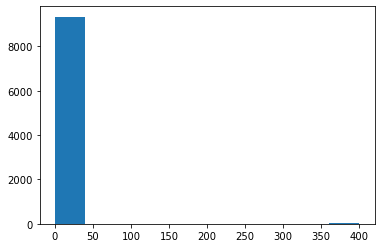

In [51]:
plt.hist(df['Price'])
plt.show()

In [56]:
print
(df.loc[df['Price'] > 200])

App   Category  Rating  Reviews   Size  \
4197          most expensive app (H)     FAMILY     4.3        6   1500   
4362                      üíé I'm rich  LIFESTYLE     3.8      718  26000   
4367        I'm Rich - Trump Edition  LIFESTYLE     3.6      275   7300   
5351                       I am rich  LIFESTYLE     3.8     3547   1800   
5354                  I am Rich Plus     FAMILY     4.0      856   8700   
5355                   I am rich VIP  LIFESTYLE     3.8      411   2600   
5356               I Am Rich Premium    FINANCE     4.1     1867   4700   
5357             I am extremely Rich  LIFESTYLE     2.9       41   2900   
5358                      I am Rich!    FINANCE     3.8       93  22000   
5359              I am rich(premium)    FINANCE     3.5      472    965   
5362                   I Am Rich Pro     FAMILY     4.4      201   2700   
5364  I am rich (Most expensive app)    FINANCE     4.1      129   2700   
5366                       I Am Rich     FAMILY     3.6      217   4900   
5369                       I am Rich    FINANCE     4.3      180   3800   
5373              I AM RICH PRO PLUS    FINANCE     4.0       36  41000   

      Installs  Type   Price Content Rating         Genres       Last Updated  \
4197       100  Paid  399.99       Everyone  Entertainment      July 16, 2018   
4362     10000  Paid  399.99       Everyone      Lifestyle     March 11, 2018   
4367     10000  Paid  400.00       Everyone      Lifestyle        May 3, 2018   
5351    100000  Paid  399.99       Everyone      Lifestyle   January 12, 2018   
5354     10000  Paid  399.99       Everyone  Entertainment       May 19, 2018   
5355     10000  Paid  299.99       Everyone      Lifestyle      July 21, 2018   
5356     50000  Paid  399.99       Everyone        Finance  November 12, 2017   
5357      1000  Paid  379.99       Everyone      Lifestyle       July 1, 2018   
5358      1000  Paid  399.99       Everyone        Finance  December 11, 2017   
5359      5000  Paid  399.99       Everyone        Finance        May 1, 2017   
5362      5000  Paid  399.99       Everyone  Entertainment       May 30, 2017   
5364      1000  Paid  399.99           Teen        Finance   December 6, 2017   
5366     10000  Paid  389.99       Everyone  Entertainment      June 22, 2018   
5369      5000  Paid  399.99       Everyone        Finance     March 22, 2018   
5373      1000  Paid  399.99       Everyone        Finance      June 25, 2018   

     Current Ver   Android Ver  
4197         1.0    7.0 and up  
4362       1.0.0    4.4 and up  
4367       1.0.1    4.1 and up  
5351         2.0  4.0.3 and up  
5354         3.0    4.4 and up  
5355       1.1.1    4.3 and up  
5356         1.6    4.0 and up  
5357         1.0    4.0 and up  
5358         1.0    4.1 and up  
5359         3.4    4.4 and up  
5362        1.54    1.6 and up  
5364           2  4.0.3 and up  
5366         1.5    4.2 and up  
5369         1.0    4.2 and up  
5373       1.0.2    4.1 and up

#  iii. After dropping the useless records, make the suitable plot again to identify  outliers

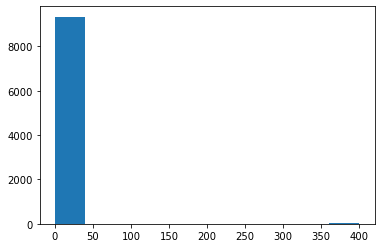

In [58]:
plt.hist(df['Price'])
plt.show()

# iv. Limit data to records with price < $30

In [59]:
gt_30 = df[df['Price'] > 30].index
df.drop(labels=gt_30, inplace=True)

In [60]:
count = df.loc[df['Price'] > 30].index
count.value_counts().sum()

0

In [61]:
df

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews   Size  Installs  Type  Price Content Rating  \
0         4.1      159  19000     10000  Free    0.0       Everyone   
1         3.9      967  14000    500000  Free    0.0       Everyone   
2         4.7    87510   8700   5000000  Free    0.0       Everyone   
3         4.5   215644  25000  50000000  Free    0.0           Teen   
4         4.3      967   2800    100000  Free    0.0       Everyone   
...       ...      ...    ...       ...   ...    ...            ...   
10834     4.0        7   2600       500  Free    0.0       Everyone   
10836     4.5       38  53000      5000  Free    0.0       Everyone   
10837     5.0        4   3600       100  Free    0.0       Everyone   
10839     4.5      114  21516      1000  Free    0.0     Mature 17+   
10840     4.5   398307  19000  10000000  Free    0.0       Everyone   

                          Genres      Last Updated         Current Ver  \
0                   Art & Design   January 7, 2018               1.0.0   
1      Art & Design;Pretend Play  January 15, 2018               2.0.0   
2                   Art & Design    August 1, 2018               1.2.4   
3                   Art & Design      June 8, 2018  Varies with device   
4        Art & Design;Creativity     June 20, 2018                 1.1   
...                          ...               ...                 ...   
10834                  Education     June 18, 2017               1.0.0   
10836                  Education     July 25, 2017                1.48   
10837                  Education      July 6, 2018                 1.0   
10839          Books & Reference  January 19, 2015  Varies with device   
10840                  Lifestyle     July 25, 2018  Varies with device   

              Android Ver  
0            4.0.3 and up  
1            4.0.3 and up  
2            4.0.3 and up  
3              4.2 and up  
4              4.4 and up  
...                   ...  
10834          4.1 and up  
10836          4.1 and up  
10837          4.1 and up  
10839  Varies with device  
10840  Varies with device  

[9338 rows x 13 columns]

# b. Reviews column
# i. Make suitable plot

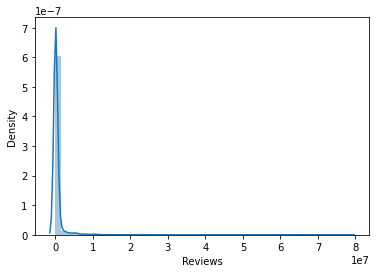

In [65]:
sns.distplot(df['Reviews'])
plt.show()

# ii. Limit data to apps with < 1 Million review

In [66]:
gt_1m = df[df['Reviews'] > 1000000 ].index
df.drop(labels = gt_1m, inplace=True)
print(gt_1m.value_counts().sum(),'cols dropped')

704 cols dropped


# c. Installs

# __>  i. What is the 95th percentile of the installs?

In [67]:
percentile = df.Installs.quantile(0.95) #95th Percentile of Installs
print(percentile,"is 95th percentile of Installs")

10000000.0 is 95th percentile of Installs


# ii. Drop records having a value more than the 95th percentile

In [69]:
for i in range(0,101,1):
    print(' the {} percentile of installs is {} '.format(i,np.percentile(df['Installs'],i)))

 the 0 percentile of installs is 5.0 
 the 1 percentile of installs is 50.0 
 the 2 percentile of installs is 100.0 
 the 3 percentile of installs is 100.0 
 the 4 percentile of installs is 100.0 
 the 5 percentile of installs is 100.0 
 the 6 percentile of installs is 500.0 
 the 7 percentile of installs is 500.0 
 the 8 percentile of installs is 1000.0 
 the 9 percentile of installs is 1000.0 
 the 10 percentile of installs is 1000.0 
 the 11 percentile of installs is 1000.0 
 the 12 percentile of installs is 1000.0 
 the 13 percentile of installs is 1000.0 
 the 14 percentile of installs is 1000.0 
 the 15 percentile of installs is 1000.0 
 the 16 percentile of installs is 5000.0 
 the 17 percentile of installs is 5000.0 
 the 18 percentile of installs is 5000.0 
 the 19 percentile of installs is 5000.0 
 the 20 percentile of installs is 5000.0 
 the 21 percentile of installs is 10000.0 
 the 22 percentile of installs is 10000.0 
 the 23 percentile of installs is 10000.0 
 the 24 pe

In [70]:
temp1 = df[df["Installs"] > percentile].index
df.drop(labels = temp1, inplace = True)
print(temp1.value_counts().sum())#,'cols dropped')

199


# Data analysis to answer business questions

# 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower  values?


# __>  a. How do you explain this?

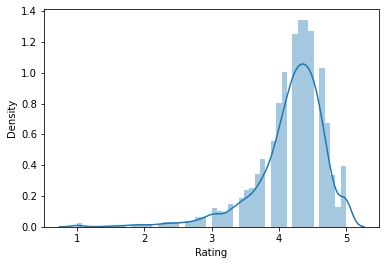

The skewness of this distribution is -1.7434270330647985
The Median of this distribution 4.3 is greater than mean 4.170800237107298 of this distribution


In [71]:
sns.distplot(df['Rating'])
plt.show()
print('The skewness of this distribution is',df['Rating'].skew())
print('The Median of this distribution {} is greater than mean {} of this distribution'.format(df.Rating.median(),df.Rating.mean()))

# b. What is the implication of this on your analysis?

In [72]:
df['Rating'].mode()

0    4.3
dtype: float64

# 6. What are the top Content Rating values?


#  -->   a. Are there any values with very few records?

In [73]:
df

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
5                             Paper flowers instructions       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews   Size  Installs  Type  Price Content Rating  \
0         4.1      159  19000     10000  Free    0.0       Everyone   
1         3.9      967  14000    500000  Free    0.0       Everyone   
2         4.7    87510   8700   5000000  Free    0.0       Everyone   
4         4.3      967   2800    100000  Free    0.0       Everyone   
5         4.4      167   5600     50000  Free    0.0       Everyone   
...       ...      ...    ...       ...   ...    ...            ...   
10834     4.0        7   2600       500  Free    0.0       Everyone   
10836     4.5       38  53000      5000  Free    0.0       Everyone   
10837     5.0        4   3600       100  Free    0.0       Everyone   
10839     4.5      114  21516      1000  Free    0.0     Mature 17+   
10840     4.5   398307  19000  10000000  Free    0.0       Everyone   

                          Genres      Last Updated         Current Ver  \
0                   Art & Design   January 7, 2018               1.0.0   
1      Art & Design;Pretend Play  January 15, 2018               2.0.0   
2                   Art & Design    August 1, 2018               1.2.4   
4        Art & Design;Creativity     June 20, 2018                 1.1   
5                   Art & Design    March 26, 2017                 1.0   
...                          ...               ...                 ...   
10834                  Education     June 18, 2017               1.0.0   
10836                  Education     July 25, 2017                1.48   
10837                  Education      July 6, 2018                 1.0   
10839          Books & Reference  January 19, 2015  Varies with device   
10840                  Lifestyle     July 25, 2018  Varies with device   

              Android Ver  
0            4.0.3 and up  
1            4.0.3 and up  
2            4.0.3 and up  
4              4.4 and up  
5              2.3 and up  
...                   ...  
10834          4.1 and up  
10836          4.1 and up  
10837          4.1 and up  
10839  Varies with device  
10840  Varies with device  

[8435 rows x 13 columns]

In [74]:
df['Content Rating'].value_counts() # Adults only 18+ and Unrated are values with very few records so we drop them.

Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

# b. If yes, drop those as they won‚Äôt help in the analysis

In [75]:
#Replacing unwanted values with NaN
cr = []
for k in df['Content Rating']:
    cr.append(k.replace('Adults only 18+','NaN').replace('Unrated','NaN'))

df['Content Rating']=cr

In [76]:
# Droping the NaN values.
temp2 = df[df["Content Rating"] == 'NaN'].index
df.drop(labels=temp2, inplace=True)
print('droped cols',temp2)

droped cols Int64Index([298, 3043, 6424, 8266], dtype='int64')


In [77]:
df['Content Rating'].value_counts() # Just  Check

Everyone        6782
Teen             900
Mature 17+       417
Everyone 10+     332
Name: Content Rating, dtype: int64

In [78]:
df

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
5                             Paper flowers instructions       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews   Size  Installs  Type  Price Content Rating  \
0         4.1      159  19000     10000  Free    0.0       Everyone   
1         3.9      967  14000    500000  Free    0.0       Everyone   
2         4.7    87510   8700   5000000  Free    0.0       Everyone   
4         4.3      967   2800    100000  Free    0.0       Everyone   
5         4.4      167   5600     50000  Free    0.0       Everyone   
...       ...      ...    ...       ...   ...    ...            ...   
10834     4.0        7   2600       500  Free    0.0       Everyone   
10836     4.5       38  53000      5000  Free    0.0       Everyone   
10837     5.0        4   3600       100  Free    0.0       Everyone   
10839     4.5      114  21516      1000  Free    0.0     Mature 17+   
10840     4.5   398307  19000  10000000  Free    0.0       Everyone   

                          Genres      Last Updated         Current Ver  \
0                   Art & Design   January 7, 2018               1.0.0   
1      Art & Design;Pretend Play  January 15, 2018               2.0.0   
2                   Art & Design    August 1, 2018               1.2.4   
4        Art & Design;Creativity     June 20, 2018                 1.1   
5                   Art & Design    March 26, 2017                 1.0   
...                          ...               ...                 ...   
10834                  Education     June 18, 2017               1.0.0   
10836                  Education     July 25, 2017                1.48   
10837                  Education      July 6, 2018                 1.0   
10839          Books & Reference  January 19, 2015  Varies with device   
10840                  Lifestyle     July 25, 2018  Varies with device   

              Android Ver  
0            4.0.3 and up  
1            4.0.3 and up  
2            4.0.3 and up  
4              4.4 and up  
5              2.3 and up  
...                   ...  
10834          4.1 and up  
10836          4.1 and up  
10837          4.1 and up  
10839  Varies with device  
10840  Varies with device  

[8431 rows x 13 columns]

# 7. Effect of size on rating


#   a. Make a joinplot to understand the effect of size on rating

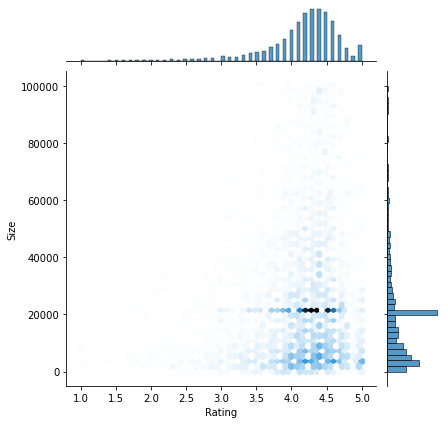

In [79]:
sns.jointplot(y ='Size', x ='Rating', data = df, kind ='hex')
plt.show()

# b. Do you see any patterns?
-->  Yes, patterns can be observed between Size and Rating ie. their is correlation between Size and Rating.

# c. How do you explain the pattern?

# 8. Effect of price on rating

# a. Make a jointplot (with regression line)

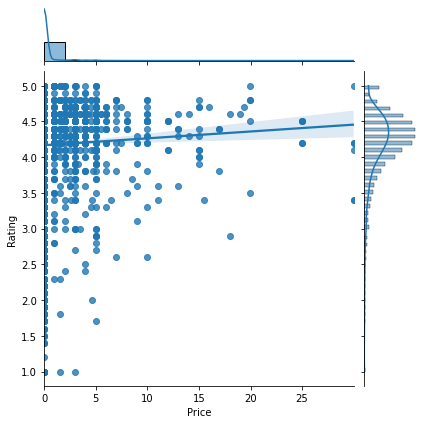

In [80]:
sns.jointplot(x='Price', y='Rating', data=df, kind='reg')
plt.show()

# b. What pattern do you see?

# c. How do you explain the pattern?




In [84]:
df.corr()

Rating   Reviews      Size  Installs     Price
Rating    1.000000  0.158547  0.058076  0.118414  0.031479
Reviews   0.158547  1.000000  0.204666  0.736038 -0.073446
Size      0.058076  0.204666  1.000000  0.190739 -0.001054
Installs  0.118414  0.736038  0.190739  1.000000 -0.110507
Price     0.031479 -0.073446 -0.001054 -0.110507  1.000000

In [83]:
df

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
5                             Paper flowers instructions       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews   Size  Installs  Type  Price Content Rating  \
0         4.1      159  19000     10000  Free    0.0       Everyone   
1         3.9      967  14000    500000  Free    0.0       Everyone   
2         4.7    87510   8700   5000000  Free    0.0       Everyone   
4         4.3      967   2800    100000  Free    0.0       Everyone   
5         4.4      167   5600     50000  Free    0.0       Everyone   
...       ...      ...    ...       ...   ...    ...            ...   
10834     4.0        7   2600       500  Free    0.0       Everyone   
10836     4.5       38  53000      5000  Free    0.0       Everyone   
10837     5.0        4   3600       100  Free    0.0       Everyone   
10839     4.5      114  21516      1000  Free    0.0     Mature 17+   
10840     4.5   398307  19000  10000000  Free    0.0       Everyone   

                          Genres      Last Updated         Current Ver  \
0                   Art & Design   January 7, 2018               1.0.0   
1      Art & Design;Pretend Play  January 15, 2018               2.0.0   
2                   Art & Design    August 1, 2018               1.2.4   
4        Art & Design;Creativity     June 20, 2018                 1.1   
5                   Art & Design    March 26, 2017                 1.0   
...                          ...               ...                 ...   
10834                  Education     June 18, 2017               1.0.0   
10836                  Education     July 25, 2017                1.48   
10837                  Education      July 6, 2018                 1.0   
10839          Books & Reference  January 19, 2015  Varies with device   
10840                  Lifestyle     July 25, 2018  Varies with device   

              Android Ver  
0            4.0.3 and up  
1            4.0.3 and up  
2            4.0.3 and up  
4              4.4 and up  
5              2.3 and up  
...                   ...  
10834          4.1 and up  
10836          4.1 and up  
10837          4.1 and up  
10839  Varies with device  
10840  Varies with device  

[8431 rows x 13 columns]

# d. Replot the data, this time with only records with price > 0 

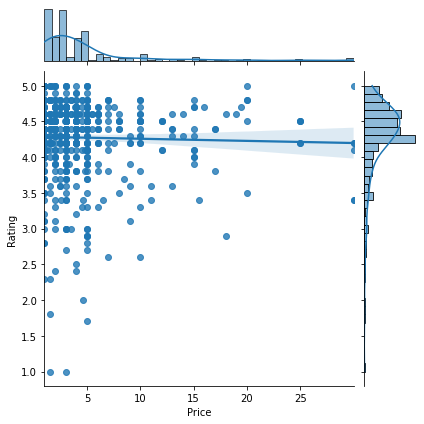

In [85]:
ps1=df.loc[df.Price>0]
sns.jointplot(x='Price', y='Rating', data=ps1, kind='reg')
plt.show()

# e. Does the pattern change?

In [87]:
df.corr()

Rating   Reviews      Size  Installs     Price
Rating    1.000000  0.158547  0.058076  0.118414  0.031479
Reviews   0.158547  1.000000  0.204666  0.736038 -0.073446
Size      0.058076  0.204666  1.000000  0.190739 -0.001054
Installs  0.118414  0.736038  0.190739  1.000000 -0.110507
Price     0.031479 -0.073446 -0.001054 -0.110507  1.000000

#  f. What is your overall inference on the effect of price on the rating

In [88]:
df

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
5                             Paper flowers instructions       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews   Size  Installs  Type  Price Content Rating  \
0         4.1      159  19000     10000  Free    0.0       Everyone   
1         3.9      967  14000    500000  Free    0.0       Everyone   
2         4.7    87510   8700   5000000  Free    0.0       Everyone   
4         4.3      967   2800    100000  Free    0.0       Everyone   
5         4.4      167   5600     50000  Free    0.0       Everyone   
...       ...      ...    ...       ...   ...    ...            ...   
10834     4.0        7   2600       500  Free    0.0       Everyone   
10836     4.5       38  53000      5000  Free    0.0       Everyone   
10837     5.0        4   3600       100  Free    0.0       Everyone   
10839     4.5      114  21516      1000  Free    0.0     Mature 17+   
10840     4.5   398307  19000  10000000  Free    0.0       Everyone   

                          Genres      Last Updated         Current Ver  \
0                   Art & Design   January 7, 2018               1.0.0   
1      Art & Design;Pretend Play  January 15, 2018               2.0.0   
2                   Art & Design    August 1, 2018               1.2.4   
4        Art & Design;Creativity     June 20, 2018                 1.1   
5                   Art & Design    March 26, 2017                 1.0   
...                          ...               ...                 ...   
10834                  Education     June 18, 2017               1.0.0   
10836                  Education     July 25, 2017                1.48   
10837                  Education      July 6, 2018                 1.0   
10839          Books & Reference  January 19, 2015  Varies with device   
10840                  Lifestyle     July 25, 2018  Varies with device   

              Android Ver  
0            4.0.3 and up  
1            4.0.3 and up  
2            4.0.3 and up  
4              4.4 and up  
5              2.3 and up  
...                   ...  
10834          4.1 and up  
10836          4.1 and up  
10837          4.1 and up  
10839  Varies with device  
10840  Varies with device  

[8431 rows x 13 columns]

# 9. Look at all the numeric interactions together ‚Äì 

# a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

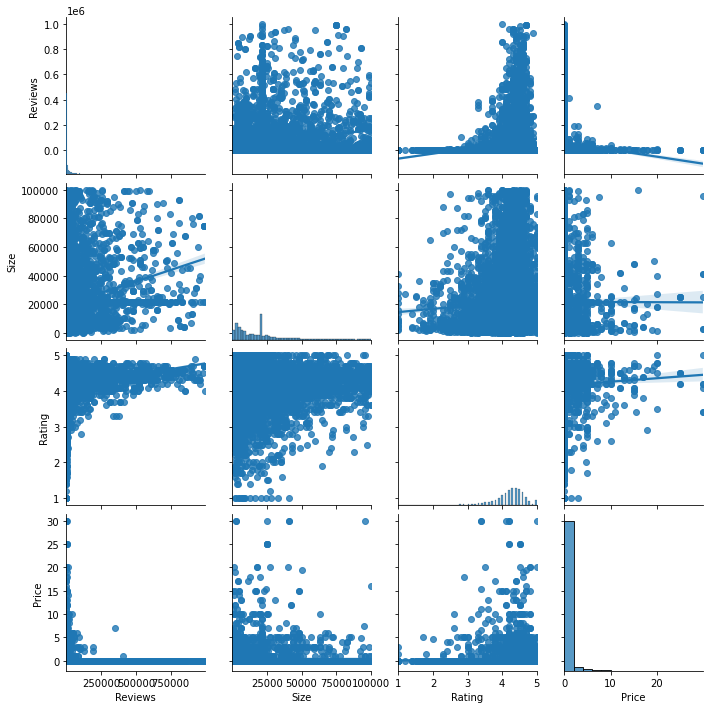

In [89]:
sns.pairplot(df, vars=['Reviews', 'Size', 'Rating', 'Price'], kind='reg')
plt.show()

In [90]:
df

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
5                             Paper flowers instructions       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews   Size  Installs  Type  Price Content Rating  \
0         4.1      159  19000     10000  Free    0.0       Everyone   
1         3.9      967  14000    500000  Free    0.0       Everyone   
2         4.7    87510   8700   5000000  Free    0.0       Everyone   
4         4.3      967   2800    100000  Free    0.0       Everyone   
5         4.4      167   5600     50000  Free    0.0       Everyone   
...       ...      ...    ...       ...   ...    ...            ...   
10834     4.0        7   2600       500  Free    0.0       Everyone   
10836     4.5       38  53000      5000  Free    0.0       Everyone   
10837     5.0        4   3600       100  Free    0.0       Everyone   
10839     4.5      114  21516      1000  Free    0.0     Mature 17+   
10840     4.5   398307  19000  10000000  Free    0.0       Everyone   

                          Genres      Last Updated         Current Ver  \
0                   Art & Design   January 7, 2018               1.0.0   
1      Art & Design;Pretend Play  January 15, 2018               2.0.0   
2                   Art & Design    August 1, 2018               1.2.4   
4        Art & Design;Creativity     June 20, 2018                 1.1   
5                   Art & Design    March 26, 2017                 1.0   
...                          ...               ...                 ...   
10834                  Education     June 18, 2017               1.0.0   
10836                  Education     July 25, 2017                1.48   
10837                  Education      July 6, 2018                 1.0   
10839          Books & Reference  January 19, 2015  Varies with device   
10840                  Lifestyle     July 25, 2018  Varies with device   

              Android Ver  
0            4.0.3 and up  
1            4.0.3 and up  
2            4.0.3 and up  
4              4.4 and up  
5              2.3 and up  
...                   ...  
10834          4.1 and up  
10836          4.1 and up  
10837          4.1 and up  
10839  Varies with device  
10840  Varies with device  

[8431 rows x 13 columns]

# 10. Rating vs. content rating

# a. Make a bar plot displaying the rating for each content rating

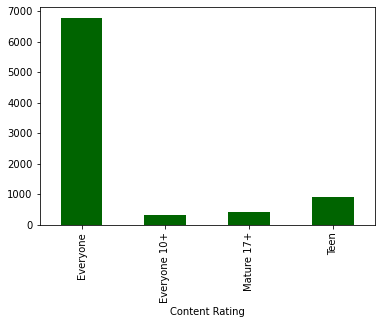

In [91]:
df.groupby(['Content Rating'])['Rating'].count().plot.bar(color="darkgreen")
plt.show()

# b. Which metric would you use? Mean? Median? Some other quantile?

-->  We must use Median in this case as we are having Outliers in Rating. Because in case of Outliers , median is the best measure of central tendency.

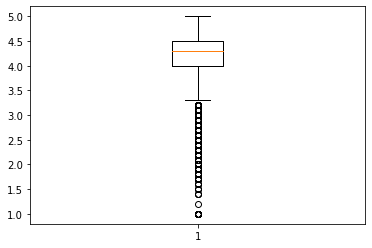

In [92]:
plt.boxplot(df['Rating'])
plt.show()

In [93]:
df

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
5                             Paper flowers instructions       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews   Size  Installs  Type  Price Content Rating  \
0         4.1      159  19000     10000  Free    0.0       Everyone   
1         3.9      967  14000    500000  Free    0.0       Everyone   
2         4.7    87510   8700   5000000  Free    0.0       Everyone   
4         4.3      967   2800    100000  Free    0.0       Everyone   
5         4.4      167   5600     50000  Free    0.0       Everyone   
...       ...      ...    ...       ...   ...    ...            ...   
10834     4.0        7   2600       500  Free    0.0       Everyone   
10836     4.5       38  53000      5000  Free    0.0       Everyone   
10837     5.0        4   3600       100  Free    0.0       Everyone   
10839     4.5      114  21516      1000  Free    0.0     Mature 17+   
10840     4.5   398307  19000  10000000  Free    0.0       Everyone   

                          Genres      Last Updated         Current Ver  \
0                   Art & Design   January 7, 2018               1.0.0   
1      Art & Design;Pretend Play  January 15, 2018               2.0.0   
2                   Art & Design    August 1, 2018               1.2.4   
4        Art & Design;Creativity     June 20, 2018                 1.1   
5                   Art & Design    March 26, 2017                 1.0   
...                          ...               ...                 ...   
10834                  Education     June 18, 2017               1.0.0   
10836                  Education     July 25, 2017                1.48   
10837                  Education      July 6, 2018                 1.0   
10839          Books & Reference  January 19, 2015  Varies with device   
10840                  Lifestyle     July 25, 2018  Varies with device   

              Android Ver  
0            4.0.3 and up  
1            4.0.3 and up  
2            4.0.3 and up  
4              4.4 and up  
5              2.3 and up  
...                   ...  
10834          4.1 and up  
10836          4.1 and up  
10837          4.1 and up  
10839  Varies with device  
10840  Varies with device  

[8431 rows x 13 columns]

# c. Choose the right metric and plot

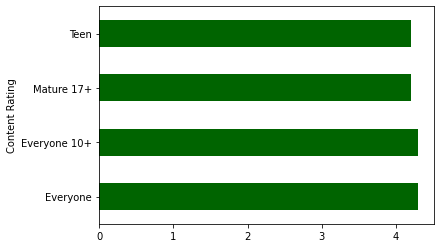

In [94]:
df.groupby(['Content Rating'])['Rating'].median().plot.barh(color="darkgreen")
plt.show()

In [95]:
df

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
5                             Paper flowers instructions       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews   Size  Installs  Type  Price Content Rating  \
0         4.1      159  19000     10000  Free    0.0       Everyone   
1         3.9      967  14000    500000  Free    0.0       Everyone   
2         4.7    87510   8700   5000000  Free    0.0       Everyone   
4         4.3      967   2800    100000  Free    0.0       Everyone   
5         4.4      167   5600     50000  Free    0.0       Everyone   
...       ...      ...    ...       ...   ...    ...            ...   
10834     4.0        7   2600       500  Free    0.0       Everyone   
10836     4.5       38  53000      5000  Free    0.0       Everyone   
10837     5.0        4   3600       100  Free    0.0       Everyone   
10839     4.5      114  21516      1000  Free    0.0     Mature 17+   
10840     4.5   398307  19000  10000000  Free    0.0       Everyone   

                          Genres      Last Updated         Current Ver  \
0                   Art & Design   January 7, 2018               1.0.0   
1      Art & Design;Pretend Play  January 15, 2018               2.0.0   
2                   Art & Design    August 1, 2018               1.2.4   
4        Art & Design;Creativity     June 20, 2018                 1.1   
5                   Art & Design    March 26, 2017                 1.0   
...                          ...               ...                 ...   
10834                  Education     June 18, 2017               1.0.0   
10836                  Education     July 25, 2017                1.48   
10837                  Education      July 6, 2018                 1.0   
10839          Books & Reference  January 19, 2015  Varies with device   
10840                  Lifestyle     July 25, 2018  Varies with device   

              Android Ver  
0            4.0.3 and up  
1            4.0.3 and up  
2            4.0.3 and up  
4              4.4 and up  
5              2.3 and up  
...                   ...  
10834          4.1 and up  
10836          4.1 and up  
10837          4.1 and up  
10839  Varies with device  
10840  Varies with device  

[8431 rows x 13 columns]

# 11. Content rating vs. size vs. rating ‚Äì 3 variables at a time

# a. Create 5 buckets (20% records in each) based on Size

In [96]:
bins=[0, 20000, 40000, 60000, 80000, 100000]
df['Bucket Size'] = pd.cut(df['Size'], bins, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])
pd.pivot_table(df, values='Rating', index='Bucket Size', columns='Content Rating')

Content Rating  Everyone  Everyone 10+  Mature 17+      Teen
Bucket Size                                                 
0-20k           4.145730      4.247561    4.010582  4.182240
20k-40k         4.200195      4.169811    4.156291  4.170432
40k-60k         4.167083      4.263636    4.190476  4.237383
60k-80k         4.245408      4.280769    4.200000  4.274194
80k-100k        4.260127      4.304762    4.252632  4.270313

# b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [97]:
temp3=pd.pivot_table(df, values='Rating', index='Bucket Size', columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))
temp3

Content Rating  Everyone  Everyone 10+  Mature 17+  Teen
Bucket Size                                             
0-20k               3.80          4.02         3.5   3.9
20k-40k             4.00          4.00         4.0   3.9
40k-60k             3.90          4.06         4.1   4.0
60k-80k             4.00          4.00         4.0   4.0
80k-100k            4.04          4.10         4.0   4.0

# c. Make a heatmap of this


#  i. Annotated

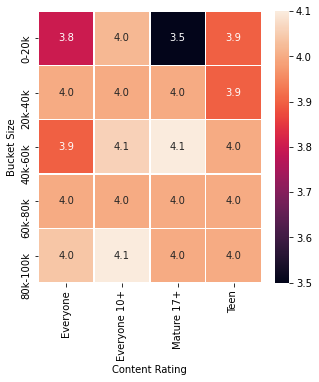

In [98]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(temp3, annot=True, linewidths=.5, fmt='.1f',ax=ax)
plt.show()

# ii. Greens color map

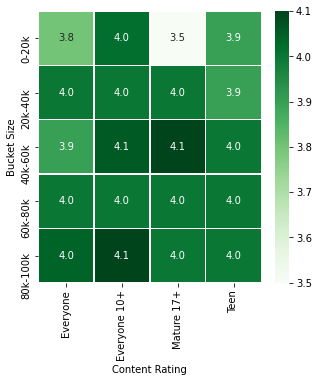

In [99]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(temp3, annot=True, linewidths=.5, cmap='Greens',fmt='.1f',ax=ax)
plt.show()

# d. What‚Äôs your inference? Are lighter apps preferred in all categories? Heavier? Some

In [101]:
df

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
5                             Paper flowers instructions       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews   Size  Installs  Type  Price Content Rating  \
0         4.1      159  19000     10000  Free    0.0       Everyone   
1         3.9      967  14000    500000  Free    0.0       Everyone   
2         4.7    87510   8700   5000000  Free    0.0       Everyone   
4         4.3      967   2800    100000  Free    0.0       Everyone   
5         4.4      167   5600     50000  Free    0.0       Everyone   
...       ...      ...    ...       ...   ...    ...            ...   
10834     4.0        7   2600       500  Free    0.0       Everyone   
10836     4.5       38  53000      5000  Free    0.0       Everyone   
10837     5.0        4   3600       100  Free    0.0       Everyone   
10839     4.5      114  21516      1000  Free    0.0     Mature 17+   
10840     4.5   398307  19000  10000000  Free    0.0       Everyone   

                          Genres      Last Updated         Current Ver  \
0                   Art & Design   January 7, 2018               1.0.0   
1      Art & Design;Pretend Play  January 15, 2018               2.0.0   
2                   Art & Design    August 1, 2018               1.2.4   
4        Art & Design;Creativity     June 20, 2018                 1.1   
5                   Art & Design    March 26, 2017                 1.0   
...                          ...               ...                 ...   
10834                  Education     June 18, 2017               1.0.0   
10836                  Education     July 25, 2017                1.48   
10837                  Education      July 6, 2018                 1.0   
10839          Books & Reference  January 19, 2015  Varies with device   
10840                  Lifestyle     July 25, 2018  Varies with device   

              Android Ver Bucket Size  
0            4.0.3 and up       0-20k  
1            4.0.3 and up       0-20k  
2            4.0.3 and up       0-20k  
4              4.4 and up       0-20k  
5              2.3 and up       0-20k  
...                   ...         ...  
10834          4.1 and up       0-20k  
10836          4.1 and up     40k-60k  
10837          4.1 and up       0-20k  
10839  Varies with device     20k-40k  
10840  Varies with device       0-20k  

[8431 rows x 14 columns]